### Esercizi statistiche locali

In [5]:
# Librerie
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.io as io
plt.rcParams['figure.figsize'] = [10, 5]

In [6]:
from skimage.exposure import equalize_hist

def glob_equaliz(x):
    y = equalize_hist(x)
    return y

Text(0.5, 1.0, 'Equalized')

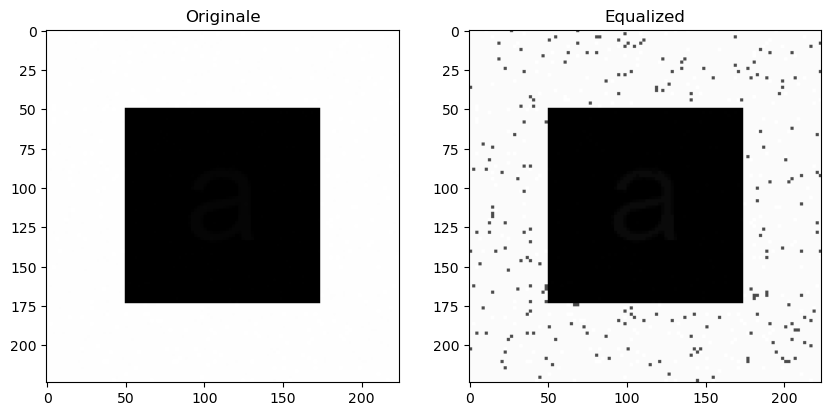

In [7]:
# Importo l'immagine
x = io.imread("img/quadrato.tif")
x = np.float32(x)

y = glob_equaliz(x)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(y, clim=None, cmap="gray")
plt.title("Equalized")

# Mi accorgo che non basta totalmente


In [16]:
from skimage.exposure import equalize_hist

def loc_equaliz(x):
    (M,N) = x.shape
    y = np.zeros((M,N))


    for i in range(1,N-1):
        for j in range(1,M-1):
            z = x[j-1:j+1, i-1:i+1] # Prendo la finestra 3x3
            z = equalize_hist(z)    # Equalizzo la finestra 3x3
            y[j-1:j+1, i-1:i+1] = z  # Vado ad inserire il risultato dell'equalizzazione nella y
    return y

In [20]:
# Funzione utilitaria
def fshs(x, k=256):
    x_min = np.min(x)
    x_max = np.max(x)

    x = (k-1)*((x-x_min)/(x_max - x_min))
    return x

Text(0.5, 1.0, 'Equalizzato')

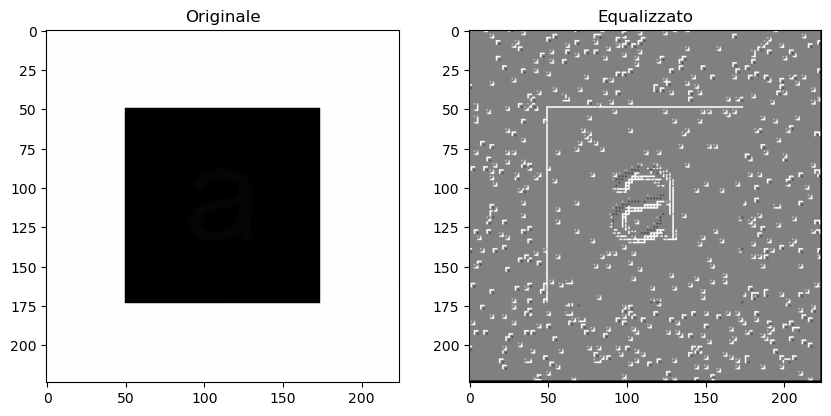

In [23]:
y = loc_equaliz(x)

plt.figure()

plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")

y = fshs(y)
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Equalizzato")


Esercizi bitplane

Text(0.5, 1.0, 'Immagine originale')

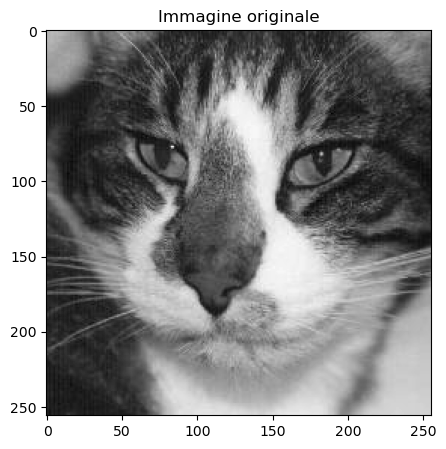

In [15]:
from bitop import bitset

# Apertura dell'immagine
x = io.imread("img/dorian.jpg")
x = np.uint8(x)

# Plot dell'immagine originale
plt.figure()
plt.imshow(x, clim=None, cmap="gray")
plt.title("Immagine originale")

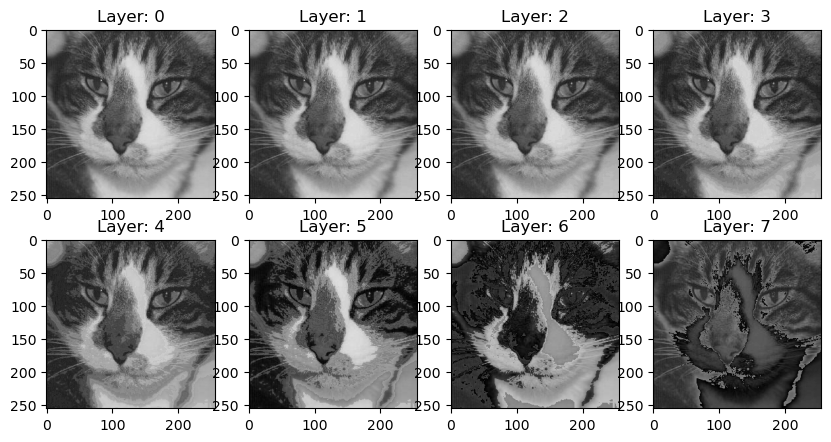

In [21]:
from bitop import bitset

# Apertura dell'immagine
x = io.imread("img/dorian.jpg")
x = np.uint8(x)

# Genero la maschera di bit pari a 0
(N,M) = x.shape
y = np.zeros((M,N), dtype=np.uint8)

# Generata la maschera vado a stampare le immagini che avrei
# Se sostituissi 0 ad un singolo layer per volta

plt.figure()
for i in range(8):
    z = bitset(x, i, y)
    plt.subplot(2,4,i+1)
    plt.imshow(z, clim=[0,255], cmap="gray")
    plt.title("Layer: " + str(i))


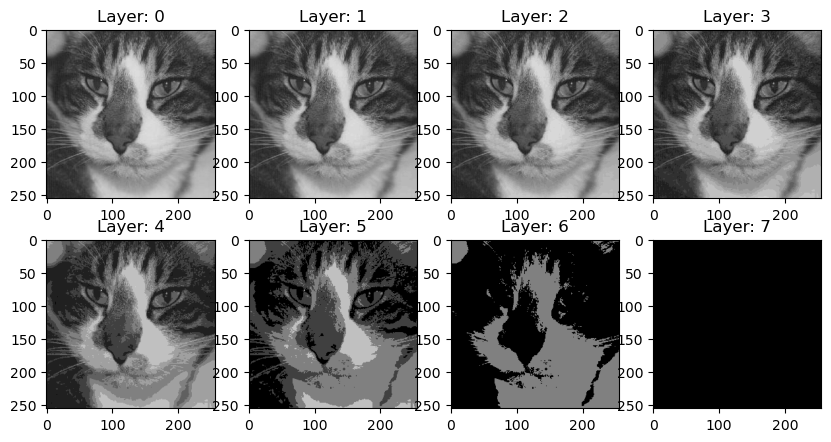

In [23]:
from bitop import bitset

# Apertura dell'immagine
x = io.imread("img/dorian.jpg")
x = np.uint8(x)

# Genero la maschera di bit pari a 0
(N,M) = x.shape
y = np.zeros((M,N), dtype=np.uint8)
z = np.copy(x)
plt.figure()
for i in range(8):
    z = bitset(z, i, y)
    plt.subplot(2,4,i+1)
    plt.imshow(z, clim=[0,255], cmap="gray")
    plt.title("Layer: " + str(i))

Watermarking

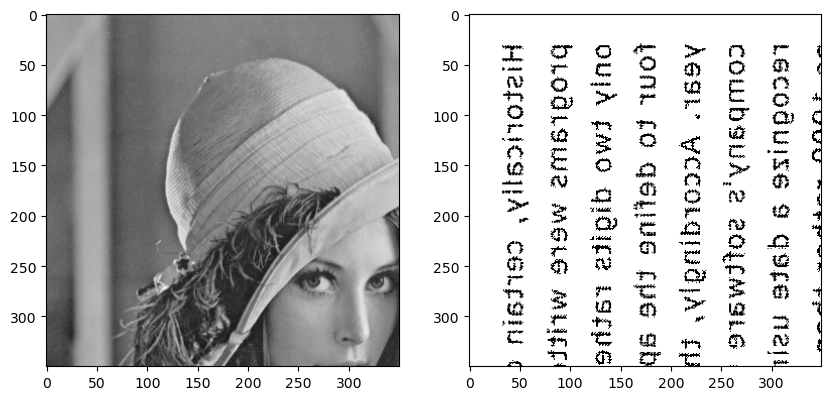

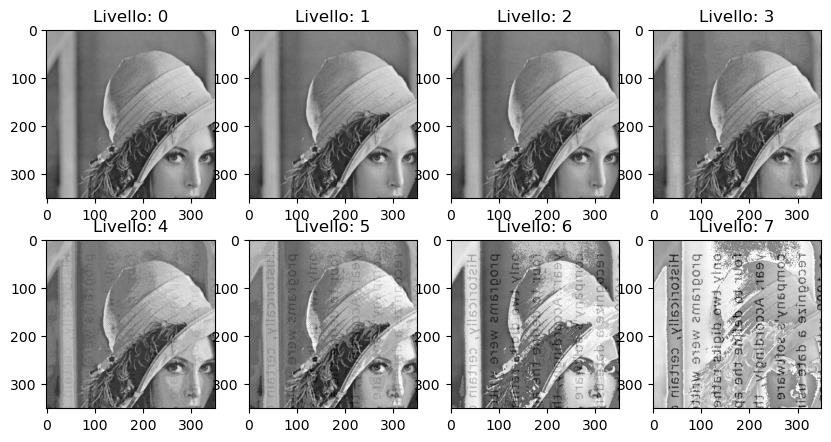

In [31]:
# Estraggo il file di lena
x = np.fromfile("img/lena.y", np.uint8)
x = np.reshape(x, (512,512))

# Estraggo il file del marchio
y = np.fromfile("img/marchio.y", np.uint8)
y = np.reshape(y, (350,350))

# Vado a ridimensionare la mia x per adattarla al tipo di watermarck
x = x[0:350, 0:350]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,1], cmap="gray")

# Mi assicuro che il watermark sia fatto sono di 0 ed 1
# Secondo il criterio per cui se ho un valore diverso da 0 sarà
# settato a 1
y[y>0] = 1

# Genero l'immagine con il watermark a vari livelli
plt.figure()
for i in range(8):
    z = bitset(x, i, y)
    plt.subplot(2,4,i+1)
    plt.imshow(z, clim=[0,255], cmap="gray")
    plt.title("Livello: " + str(i))


### Operazioni Geometriche

Distorsione

In [44]:
from skimage.transform import warp

def deforma(x, c, d):
    (M,N) = x.shape
    T = np.array([[1/c, 0, 0], [0, 1/d, 0], [0, 0, 1]], dtype=np.float32)
    y = warp(x, T, output_shape=(d*M, c*N), order=1)
    return y

Text(0.5, 1.0, 'Immagine Distorta')

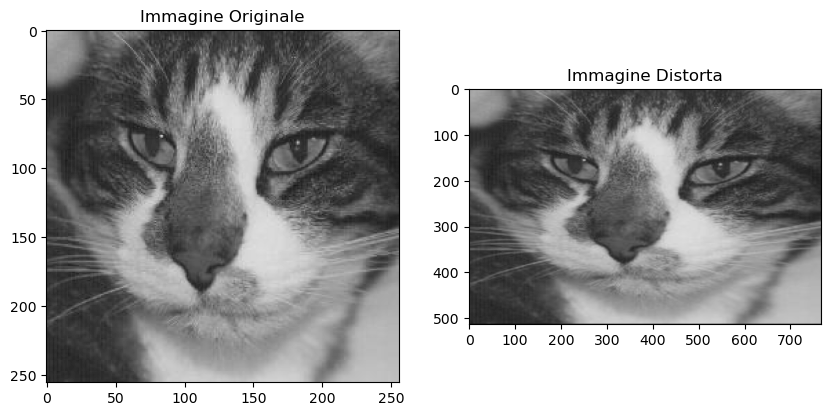

In [48]:
x = io.imread("img/dorian.jpg")
x = np.float32(x)

y = deforma(x, 3, 2)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine Originale")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")
plt.title("Immagine Distorta")

Rotazione Centrale

In [129]:
from skimage.transform import warp

def ruota(x, theta):
    (M,N) = x.shape
    T1 = np.array([[1, 0, 0], [0, 1, 0], [-M/2,-N/2, 1]], dtype=np.float32)
    Rotazione = np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]], dtype=np.float32)
    T2 = np.array([[1, 0, 0], [0, 1, 0], [M/2, N/2, 1]], dtype=np.float32)

    T = T1 @ Rotazione @ T2

    A = T[[1,0,2],:][:,[1,0,2]].T
    
    y = warp(x, A, order=1)

    
    return y

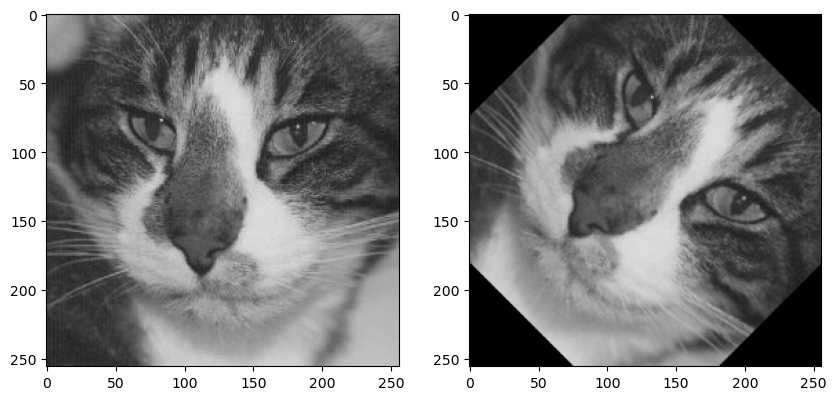

In [130]:
x = io.imread("img/dorian.jpg")
x = np.float32(x)

y = ruota(x, np.pi/4)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=[0,255], cmap="gray")
plt.subplot(1,2,2)
plt.imshow(y, clim=[0,255], cmap="gray")

Text(0.5, 1.0, 'E poi deformazione')

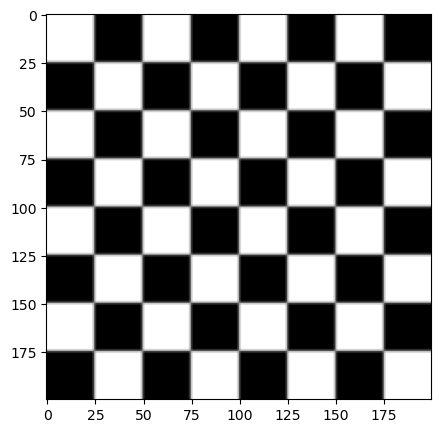

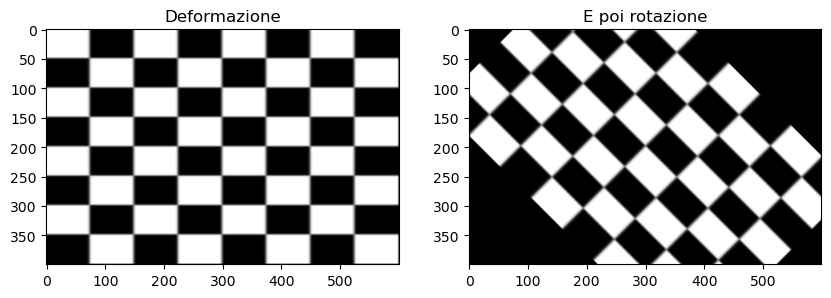

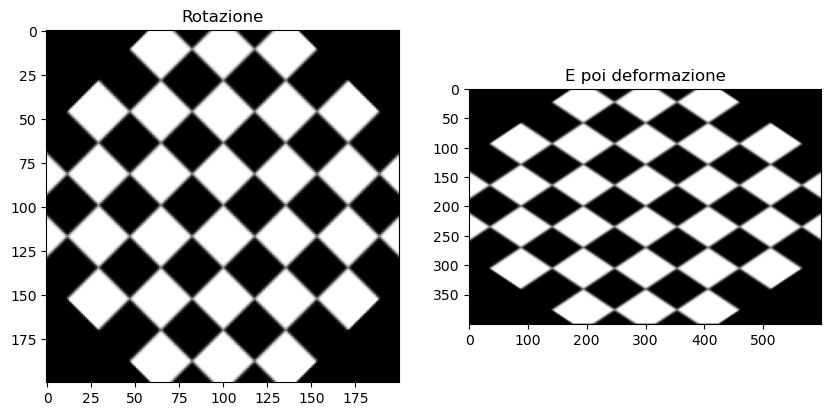

In [144]:
import skimage
import skimage.data
x = np.float32(skimage.data.checkerboard())

plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")

z = deforma(x, 3, 2)
k = ruota(z, np.pi/4)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(z, clim=[0,255], cmap="gray")
plt.title("Deformazione")
plt.subplot(1,2,2)
plt.imshow(k, clim=[0,255], cmap="gray")
plt.title("E poi rotazione")

k = ruota(x, np.pi/4)
z = deforma(k, 3, 2)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(k, clim=[0,255], cmap="gray")
plt.title("Rotazione")
plt.subplot(1,2,2)
plt.imshow(z, clim=[0,255], cmap="gray")
plt.title("E poi deformazione")

# Guardando il risultato noi preferiamo sempre il primo caso dove
# Svolgiamo prima l'espansione e poi la rotazione